# Importamos pandas y archivo principal de datos

In [1]:
import pandas as pd
datos = pd.read_csv('credit_card.csv')
datos.head()

,LIMIT_BAL,CHECKING_ACCOUNT,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,DEFAULT
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


# Renombramos columnas

In [2]:
datos.columns

Index(['LIMIT_BAL', 'CHECKING_ACCOUNT', 'EDUCATION', 'MARRIAGE', 'AGE',
       'BILL_AMT', 'PAY_AMT', 'DEFAULT'],
      dtype='object')

In [3]:
dict_columns = {'LIMIT_BAL':'limite', 
                'CHECKING_ACCOUNT':'cuenta_corriente', 
                'EDUCATION':'escolaridad', 
                'MARRIAGE':'estado_civil', 
                'AGE':'edad',
                'BILL_AMT':'valor_factura', 
                'PAY_AMT':'valor_pago', 
                'DEFAULT':'moroso'}
datos.rename(columns = dict_columns, inplace=True)
datos.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


#Cambiando valores de variables


In [4]:
dict_c_c = {'Yes':'Si','No':'No'}
datos.cuenta_corriente = datos.cuenta_corriente.map(dict_c_c)
datos.head()

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.University,Married,24,934.0122,0.0000,1
1,36132,Si,2.University,Single,26,519.3975,0.0000,1
2,27099,Si,2.University,Single,34,4223.5297,457.0698,0
3,15055,Si,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0


In [5]:
datos.escolaridad.unique()

array(['2.University', '3.Graduate School', '1.High School'], dtype=object)

In [6]:
dict_escolaridad = {'1.High School':'1.Escolar',
                    '2.University':'2.Universitario', 
                    '3.Graduate School':'3.Graduado'}
datos.escolaridad = datos.escolaridad.map(dict_escolaridad)

In [7]:
dict_estado_civil = {'Married':'Casado', 
                     'Single':'Soltero'}
datos.estado_civil = datos.estado_civil.map(dict_estado_civil)
datos

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universitario,Casado,24,934.0122,0.0000,1
1,36132,Si,2.Universitario,Soltero,26,519.3975,0.0000,1
2,27099,Si,2.Universitario,Soltero,34,4223.5297,457.0698,0
3,15055,Si,2.Universitario,Casado,37,14522.9563,602.2000,0
4,150550,No,3.Graduado,Soltero,29,124060.1253,16560.5000,0
...,...,...,...,...,...,...,...,...
1495,54198,Si,3.Graduado,Soltero,27,295.0780,0.0000,1
1496,45165,No,2.Universitario,Casado,55,23637.8555,1144.1800,0
1497,78286,No,3.Graduado,Soltero,34,962.9178,962.9178,0
1498,6022,No,2.Universitario,Casado,44,864.7592,864.7592,0


#Importando seaborn

In [8]:
!pip install seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import seaborn as sns
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno


#Ploteando columnas

<ipython-input-10-077dd7bce5ff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos['limite'])


<Axes: xlabel='limite', ylabel='Density'>

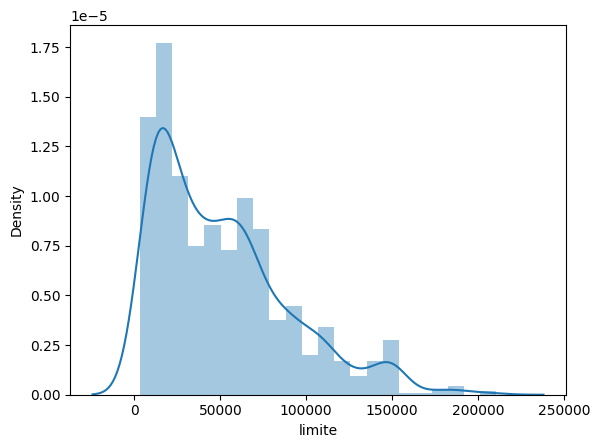

In [10]:
#sns.histplot(['limite','valor_factura'])
sns.distplot(datos['limite'])

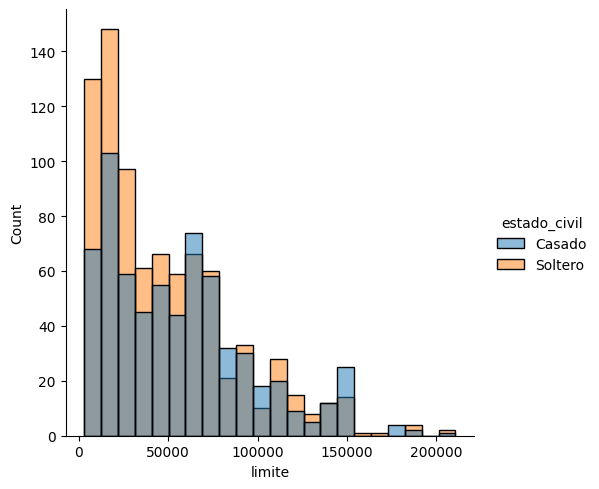

In [11]:
sns.displot(data=datos, x='limite',hue='estado_civil');

#Analizando dataset

In [12]:
datos['I.U.'] = datos['valor_factura'] / datos['limite']
datos

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,I.U.
0,6022,Si,2.Universitario,Casado,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universitario,Soltero,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universitario,Soltero,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universitario,Casado,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Graduado,Soltero,29,124060.1253,16560.5000,0,0.824046
...,...,...,...,...,...,...,...,...,...
1495,54198,Si,3.Graduado,Soltero,27,295.0780,0.0000,1,0.005444
1496,45165,No,2.Universitario,Casado,55,23637.8555,1144.1800,0,0.523367
1497,78286,No,3.Graduado,Soltero,34,962.9178,962.9178,0,0.012300
1498,6022,No,2.Universitario,Casado,44,864.7592,864.7592,0,0.143600


In [13]:
serie = datos['I.U.']>0.99
serie.unique()
serie.value_counts()

False    1487
True       13
Name: I.U., dtype: int64

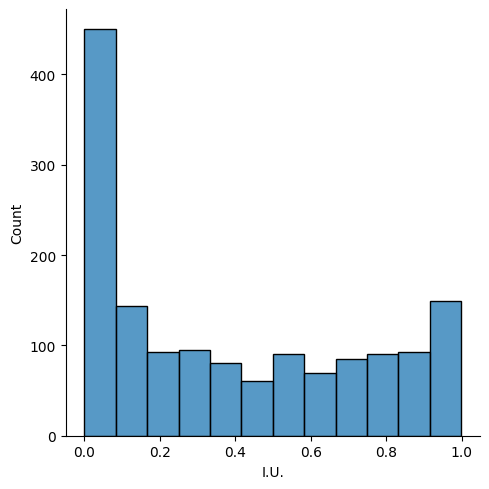

In [14]:
sns.displot(data=datos, x='I.U.')

ENTENDEMOS QUE HAY UNA SIGNIFICATIVA CANTIDAD DE USUARIOS QUE USAN MENOS DEL 15% DE SU LÍMITE PERMITIDO

#Colores y esttilos

In [15]:
sns.set_style('darkgrid')

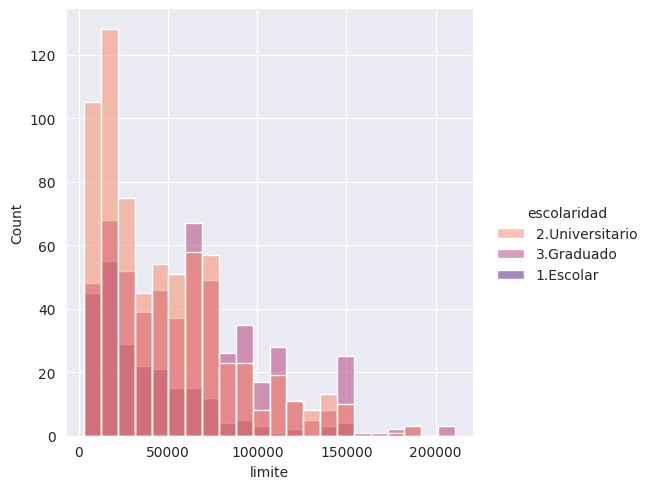

In [16]:
sns.displot(data=datos, x='limite', hue='escolaridad', palette='magma_r')

#Analisis de Variables Categóricas

<Axes: xlabel='cuenta_corriente', ylabel='count'>

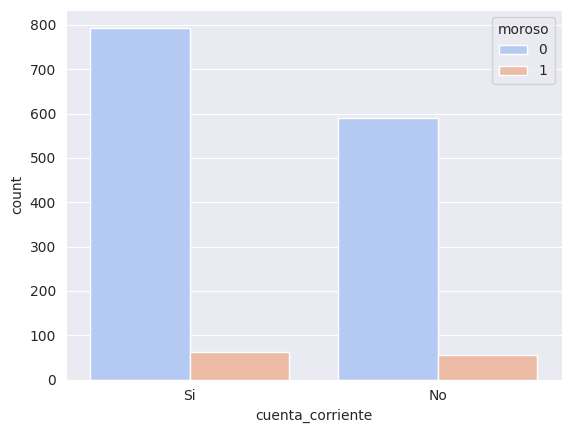

In [17]:
sns.countplot(x='cuenta_corriente', data=datos, hue='moroso', palette='coolwarm')

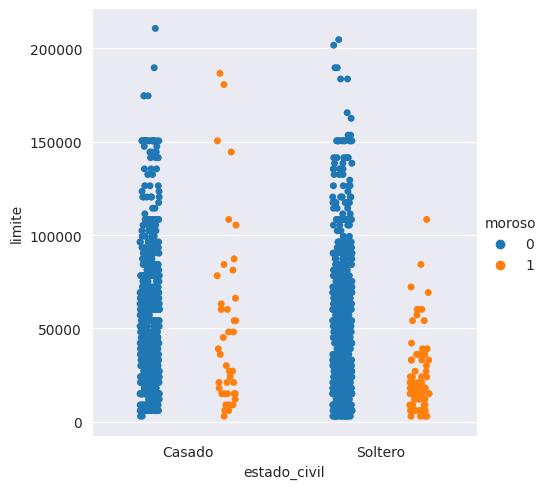

In [18]:
sns.catplot(data=datos,x='estado_civil',y='limite',hue='moroso',dodge=True)

<ipython-input-19-6d7922ee193f>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot( x='escolaridad',y='I.U.', data=datos, palette='bone')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='escolaridad', ylabel='I.U.'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


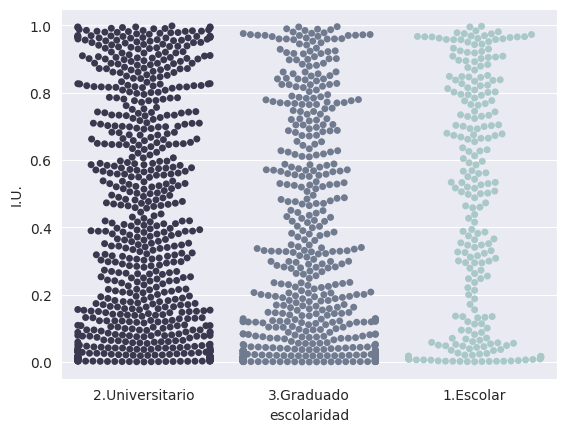

In [19]:
sns.swarmplot( x='escolaridad',y='I.U.', data=datos, palette='bone')

<Axes: xlabel='escolaridad', ylabel='I.U.'>

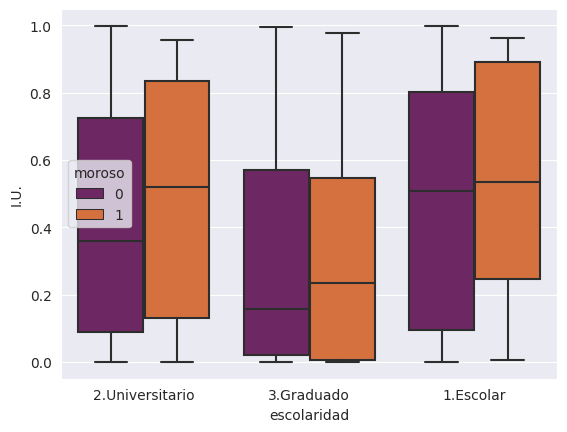

In [20]:
sns.boxplot(data=datos, x='escolaridad', y='I.U.', hue='moroso',palette='inferno')

<Axes: xlabel='escolaridad', ylabel='I.U.'>

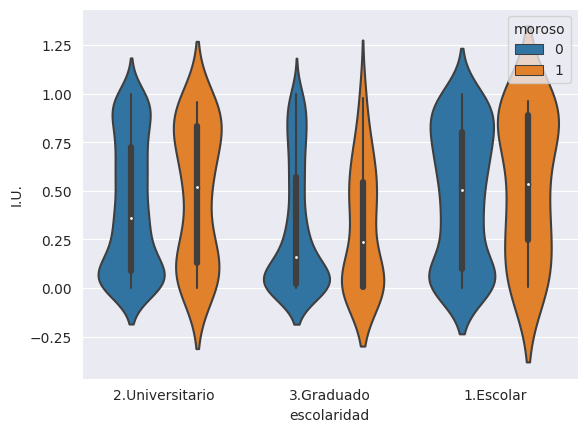

In [21]:
sns.violinplot(x='escolaridad', y='I.U.', data=datos, hue='moroso')

In [22]:
bines = [20,30,40,50,100]
nombres = ['20-30','30-40','40-50','50+']
datos['rango_edad'] = pd.cut(datos['edad'], bins=bines, labels=nombres)

#Analizando variables numéricas

<Axes: xlabel='escolaridad', ylabel='limite'>

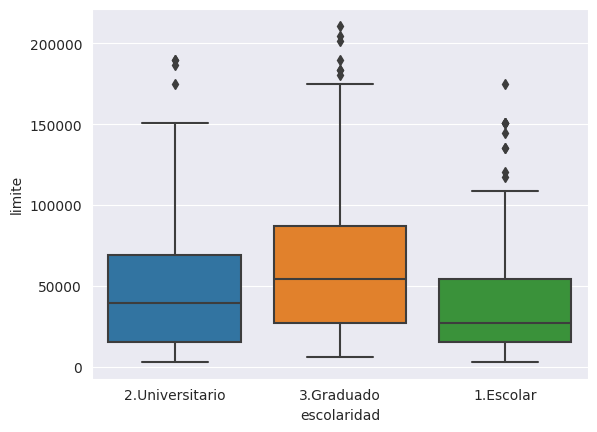

In [23]:
sns.boxplot(x='escolaridad', y='limite', data=datos)

In [24]:
bins = [0, 0.25, 0.50, 0.75, 1]
nombres = ['0%-25%', '25%-50%', '50%-75%', '75%-100%']
datos['rango_iu'] = pd.cut(datos['I.U.'], bins, labels=nombres)

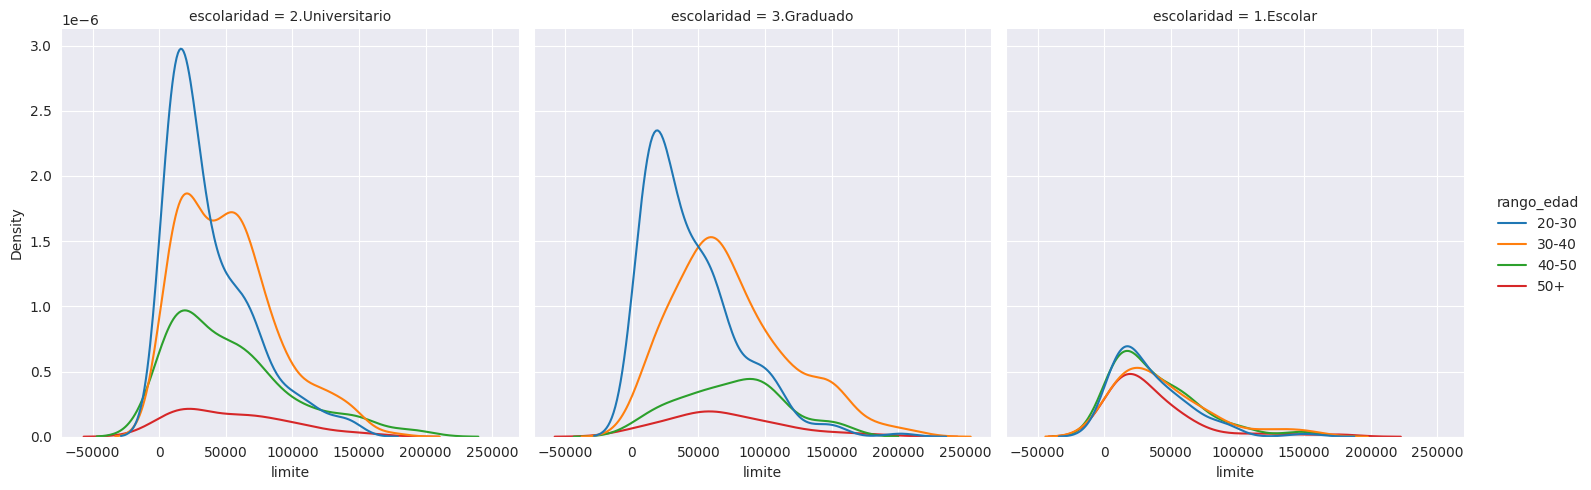

In [25]:
sns.displot(data=datos, x='limite', col='escolaridad', kind='kde', hue='rango_edad')

In [26]:
datos['indice_uso']= datos['I.U.']
del datos['I.U.']
datos

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,rango_edad,rango_iu,indice_uso
0,6022,Si,2.Universitario,Casado,24,934.0122,0.0000,1,20-30,0%-25%,0.155100
1,36132,Si,2.Universitario,Soltero,26,519.3975,0.0000,1,20-30,0%-25%,0.014375
2,27099,Si,2.Universitario,Soltero,34,4223.5297,457.0698,0,30-40,0%-25%,0.155856
3,15055,Si,2.Universitario,Casado,37,14522.9563,602.2000,0,30-40,75%-100%,0.964660
4,150550,No,3.Graduado,Soltero,29,124060.1253,16560.5000,0,20-30,75%-100%,0.824046
...,...,...,...,...,...,...,...,...,...,...,...
1495,54198,Si,3.Graduado,Soltero,27,295.0780,0.0000,1,20-30,0%-25%,0.005444
1496,45165,No,2.Universitario,Casado,55,23637.8555,1144.1800,0,50+,50%-75%,0.523367
1497,78286,No,3.Graduado,Soltero,34,962.9178,962.9178,0,30-40,0%-25%,0.012300
1498,6022,No,2.Universitario,Casado,44,864.7592,864.7592,0,40-50,0%-25%,0.143600


<Axes: xlabel='indice_uso', ylabel='valor_factura'>

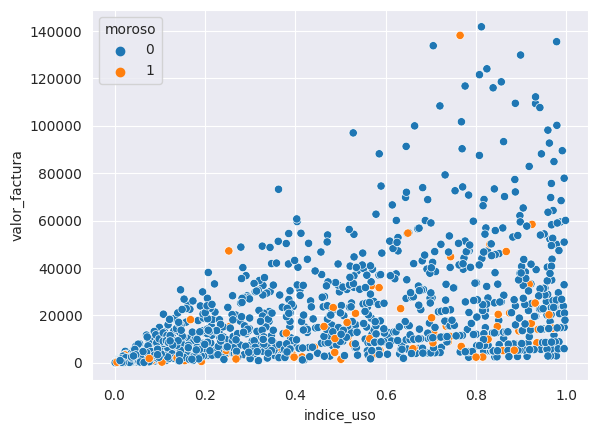

In [31]:
sns.scatterplot(data=datos, x='indice_uso', y='valor_factura', hue='moroso')

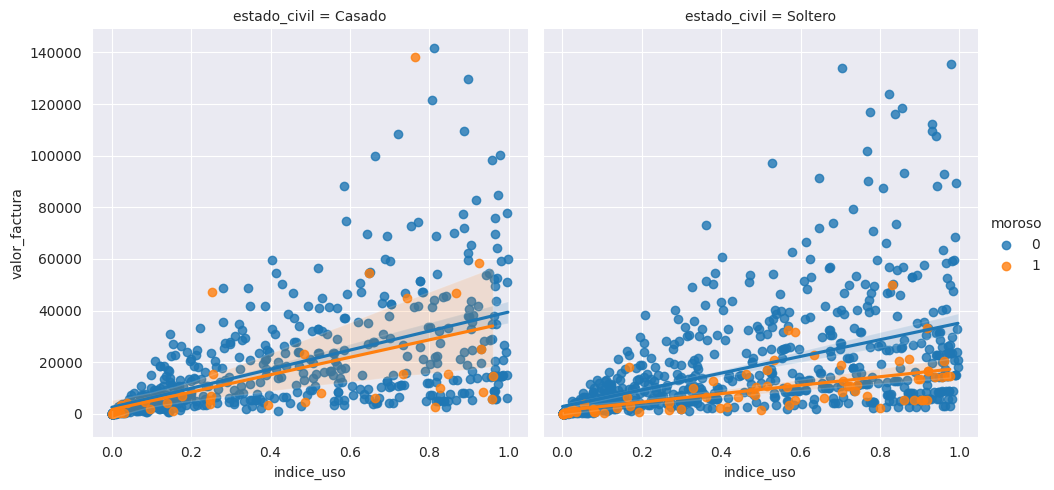

In [36]:
sns.lmplot(x='indice_uso', y='valor_factura', data=datos, col='estado_civil', hue='moroso')

# Test de hipótesis

In [35]:
from scipy.stats import ranksums

H<sup>null</sup>

El estado civil NO tiene ninguna relevancia en la morosidad y deuda de una persona

H<sup>alt</sup>

El estado civil SI tiene relevancia en la morosidad y deuda de una persona

In [43]:
p_value=ranksums(x=datos.query("estado_civil == 'Casado'").moroso, y=datos.query("estado_civil == 'Soltero'").moroso)


RanksumsResult(statistic=-0.8813446380708163, pvalue=0.3781313125535143)

Vemos que H<sup>null</sup> tiene la razón, ya que no presenta una relevancia significativa estadísticamente hablando.

In [46]:
ranksums(x=datos.query("moroso == 1").valor_factura, y=datos.query("moroso == 1").valor_factura)


RanksumsResult(statistic=0.0, pvalue=1.0)

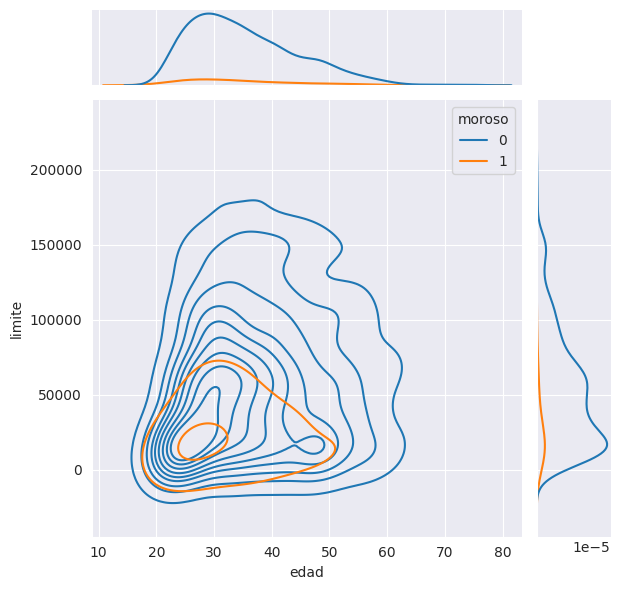

In [54]:
sns.jointplot(data=datos, x='edad', y='limite', hue='moroso', kind='kde')

#Otros gráficos descriptivos

In [55]:
datos.describe()

,limite,edad,valor_factura,valor_pago,moroso,indice_uso
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51221.943333,35.212667,15459.869900,1984.869266,0.078000,0.388237
std,39424.407462,9.274955,20722.582831,5296.771686,0.268261,0.341923
min,3011.000000,21.000000,27.701200,0.000000,0.000000,0.000188
25%,18066.000000,28.000000,2035.586550,407.011925,0.000000,0.049209
50%,42154.000000,33.500000,7701.385250,759.374200,0.000000,0.308976
75%,72264.000000,41.000000,20671.568850,1705.279850,0.000000,0.704090
max,210770.000000,75.000000,141792.506500,97022.850800,1.000000,0.998010


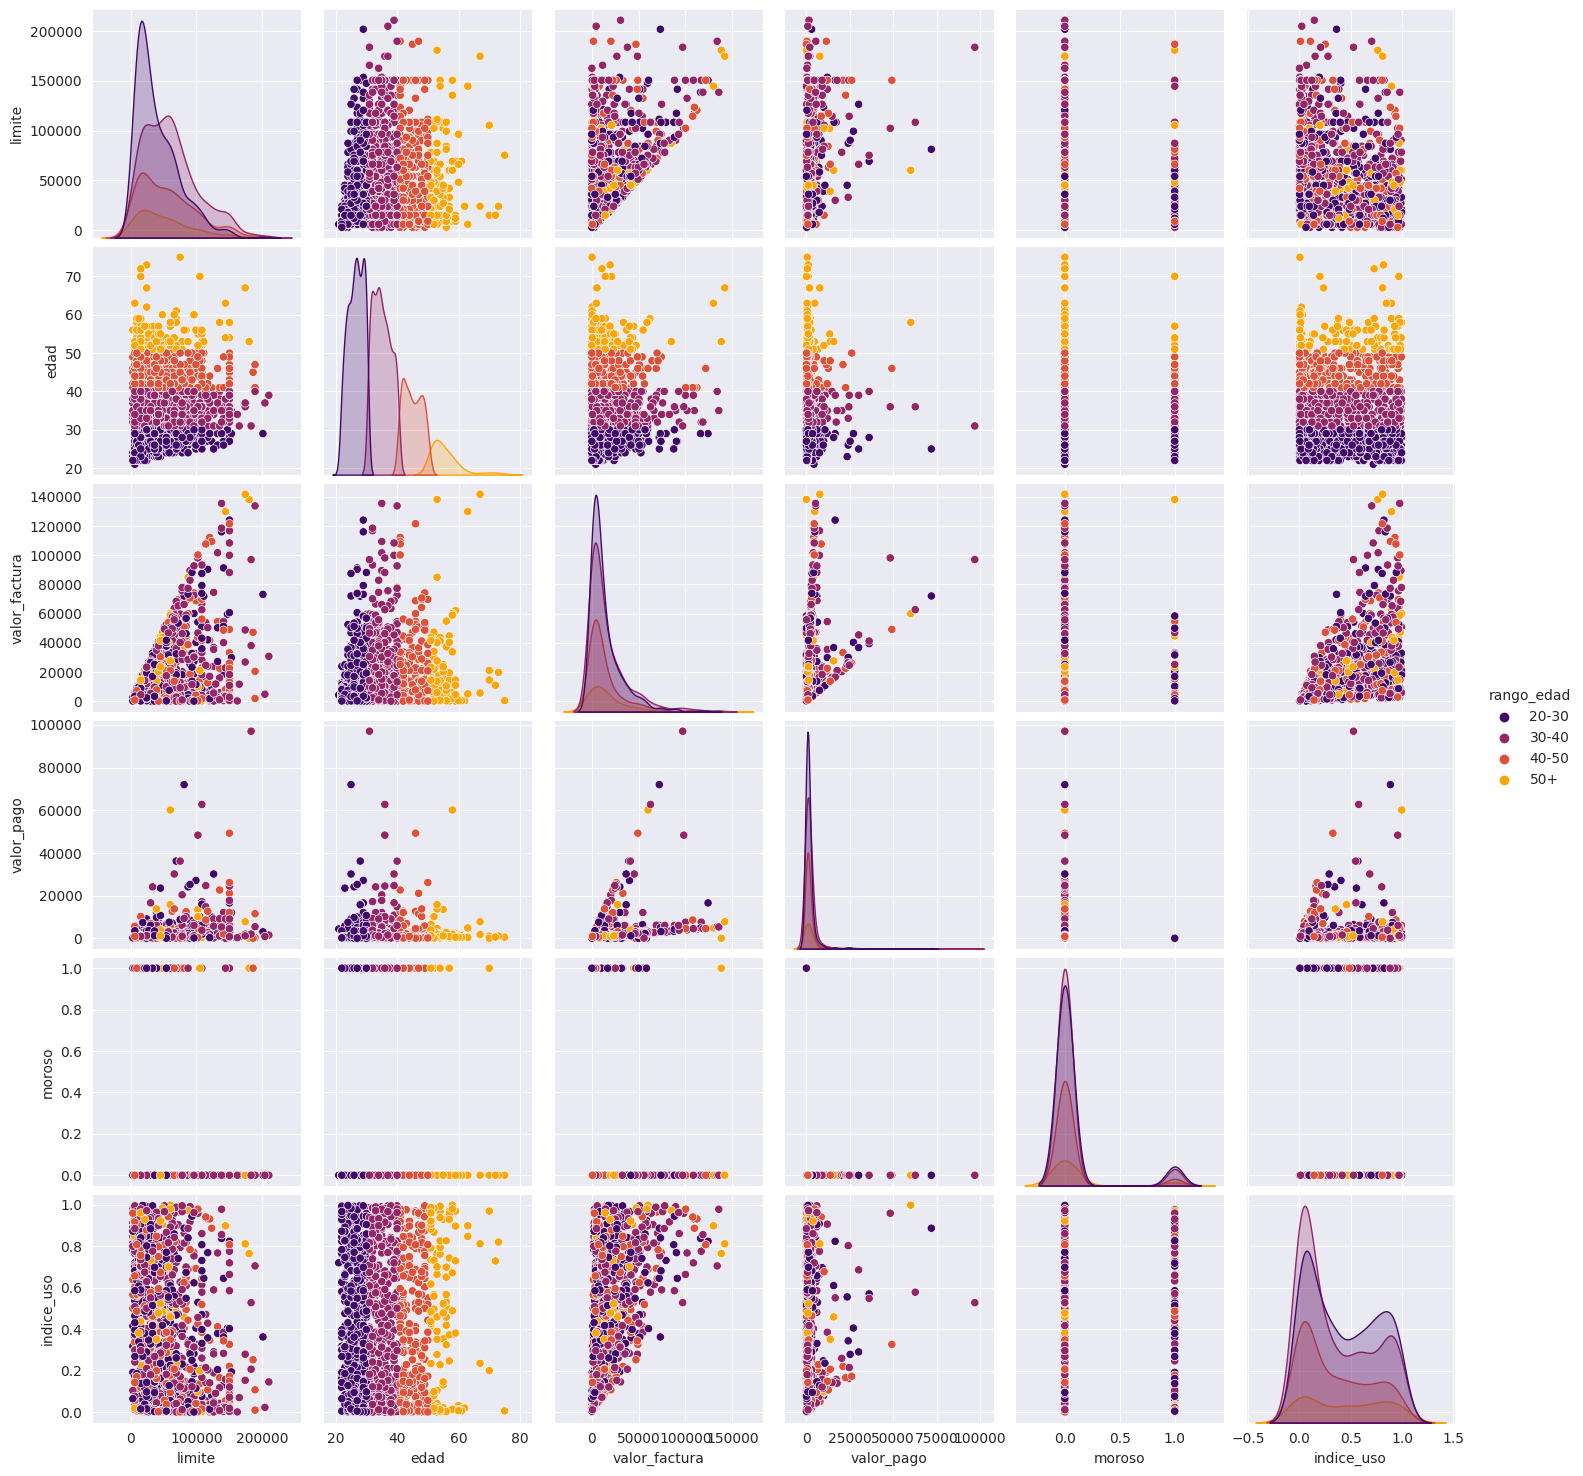

In [56]:
sns.pairplot(datos, hue='rango_edad',palette='inferno')